# EDA

In [ ]:
# Reading files
import pandas as pd
merged_df = pd.read_csv('../data/processed/merged_df.csv',low_memory=False)



In [ ]:
#change the name of df
train_df=merged_df


# Data cleaning

<Axes: >

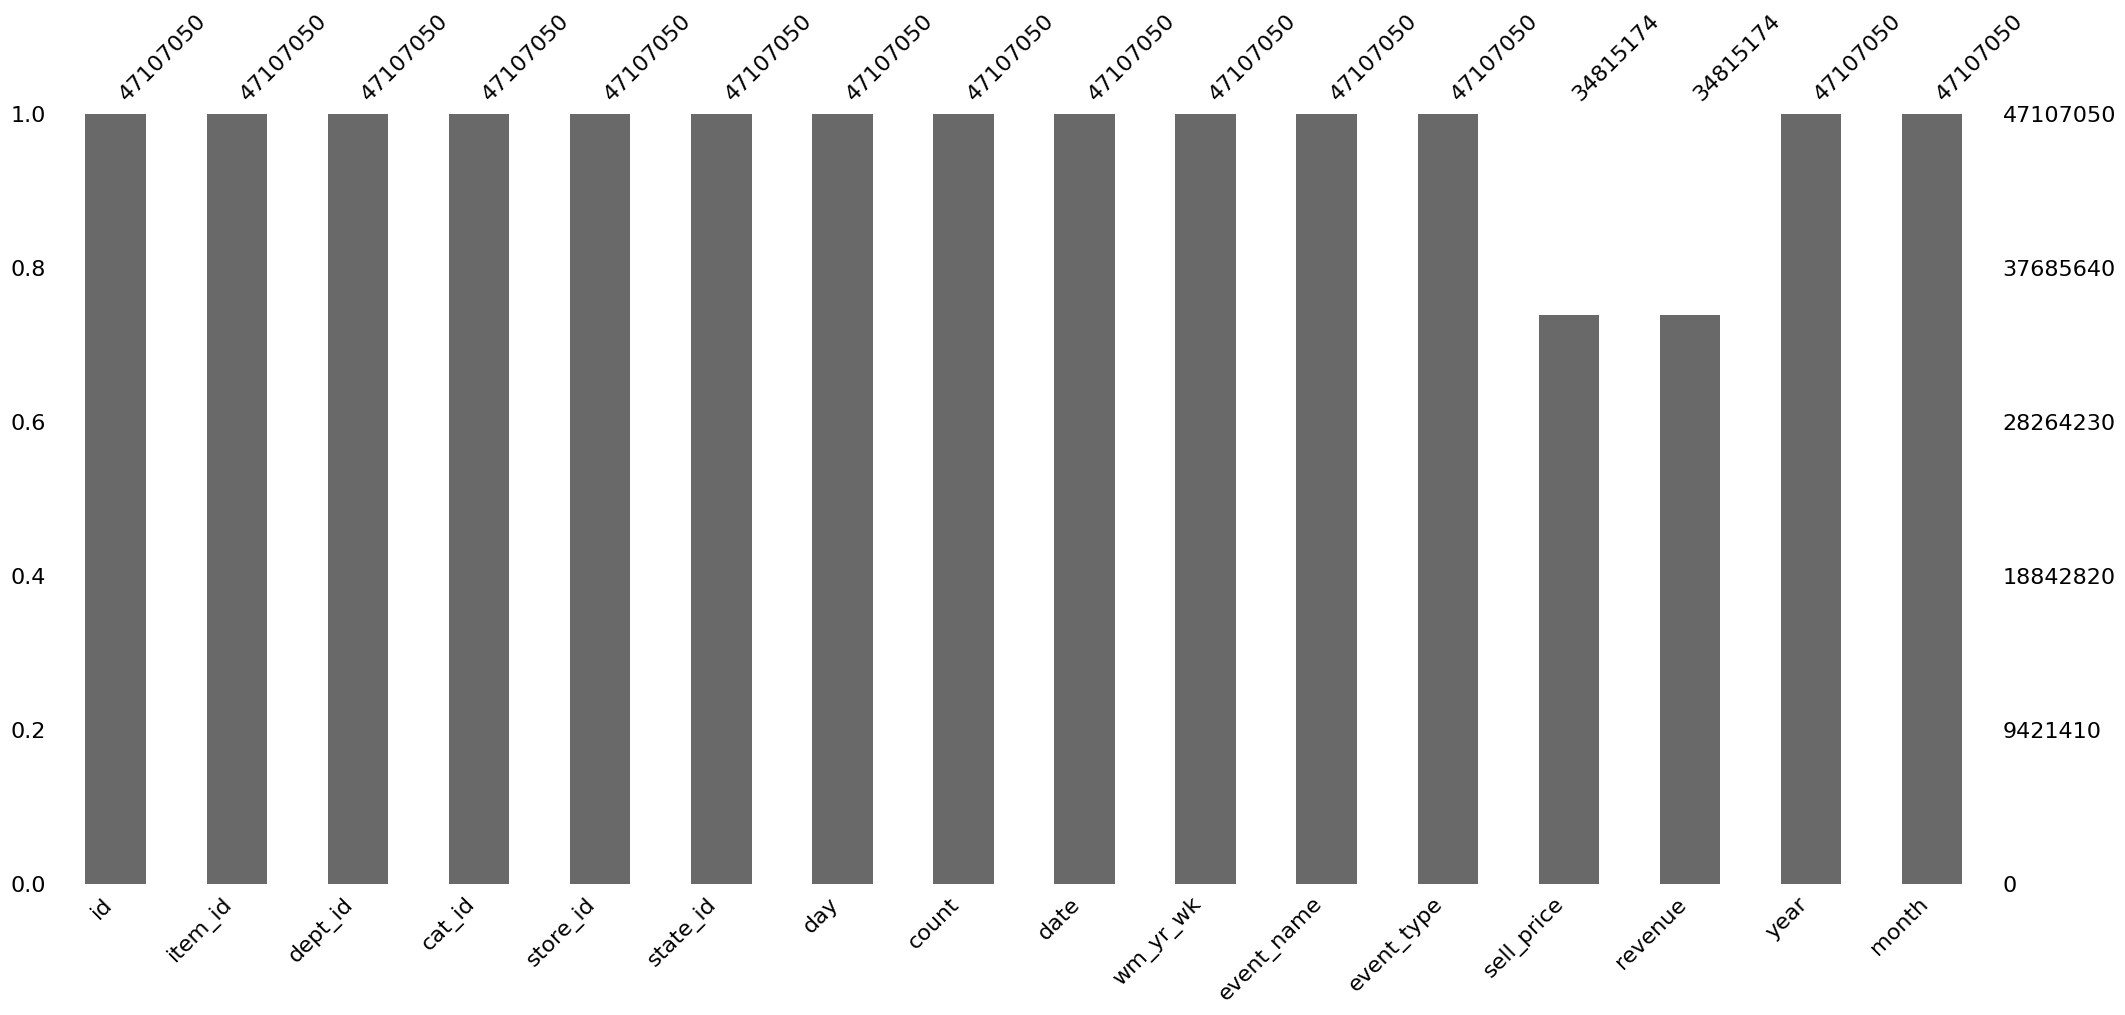

In [3]:
import missingno as msno
msno.bar(train_df)

In [ ]:
# fill missing values
# Fill missing values in 'column 1' and 'column 2' with 0
train_df['sell_price'].fillna(0, inplace=True)
train_df['revenue'].fillna(0, inplace=True)

In [ ]:
import pandas as pd

class MemoryReducer:
    def __init__(self, df):
        self.df = df.copy()

    def reduce_memory_usage(self):
        initial_memory = self.df.memory_usage(deep=True).sum() / (1024 ** 2)  # in megabytes
        print(f"Initial Memory Usage: {initial_memory:.2f} MB")

        for col in self.df.columns:
            col_type = self.df[col].dtype

            if col_type != object:
                if "int" in str(col_type):
                    self.df[col] = pd.to_numeric(self.df[col], downcast="integer")
                elif "float" in str(col_type):
                    self.df[col] = pd.to_numeric(self.df[col], downcast="float")
            else:
                num_unique_values = len(self.df[col].unique())
                num_total_values = len(self.df[col])
                if num_unique_values / num_total_values < 0.5:
                    self.df[col] = self.df[col].astype("category")

        reduced_memory = self.df.memory_usage(deep=True).sum() / (1024 ** 2)  # in megabytes
        print(f"Reduced Memory Usage: {reduced_memory:.2f} MB")
        reduction_percentage = ((initial_memory - reduced_memory) / initial_memory) * 100
        print(f"Memory Reduced by: {reduction_percentage:.2f}%")

        return self.df



reducer = MemoryReducer(train_df)
reduced_df = reducer.reduce_memory_usage()


In [ ]:
#rename
df_train=reduced_df


# Explore the dataset

In [ ]:
#see the head
df_train.head()

In [38]:
#Display the dimentions (shape) of df
df_train.shape

(47107050, 19)

In [ ]:
#Display the summary (info) of df
df_train.info()

In [ ]:
#Display the descriptive statictics of df
df_train.describe()

# See the trend


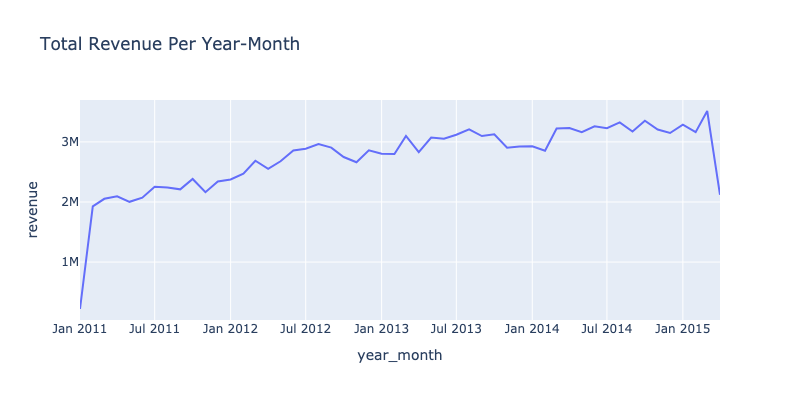

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image



# Convert the 'date' column to a datetime type
df_train['date'] = pd.to_datetime(df_train['date'])

# Create a 'year_month' column by formatting the 'date' column
df_train['year_month'] = df_train['date'].dt.strftime('%Y-%m')

# Group by 'year_month' and calculate the sum of 'revenue' for each month
grouped_data = df_train.groupby('year_month')['revenue'].sum().reset_index()

# Create a line chart using Plotly Express
fig = px.line(grouped_data, x='year_month', y='revenue', title='Total Revenue Per Year-Month')

# Customize hover text and template
fig.update_traces(text=grouped_data['year_month'],
                  hovertemplate='Year-Month: %{x}<br>Total Revenue: %{y}')

# Increase the size of the plot
fig.update_layout(width=800, height=400)

# Save the figure as an image and display it
fig_bytes = fig.to_image(format="png")
Image(fig_bytes)


In the majority of Novembers, our revenue has shown a consistent decrease, as indicated by the detailed insights derived from the Tableau chart.

In [11]:
unique_date_count = df_train['date'].nunique()
print("Number of unique dates:", unique_date_count)


Number of unique dates: 1541


# Event Type

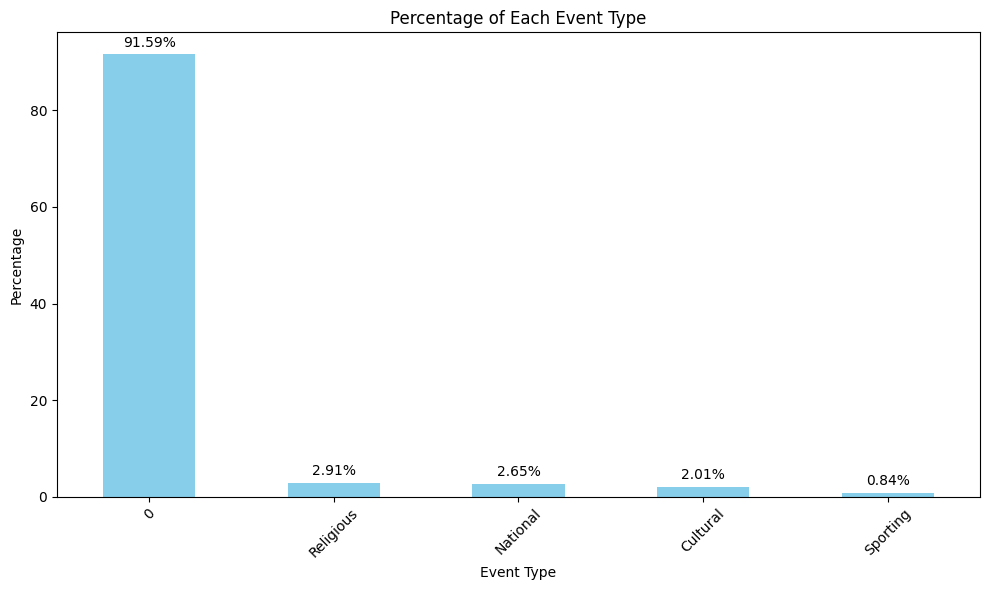

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the DataFrame by 'event_type' and count the occurrences in each group
event_counts = df_train['event_type'].value_counts()

# Calculate the percentage of each event type
event_percentages = (event_counts / event_counts.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = event_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Event Type')
plt.xlabel('Event Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Annotate the bars with percentages
for i, v in enumerate(event_percentages):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()


91.59 percent of our dataframe has no event

# Additional visualizations were crafted using Tableau to enhance our insights.